<b>How to create spectograms of various earthquake and non-earthquake signals.</b><br>A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.

In [2]:
import matplotlib.pyplot as plt 
from obspy import UTCDateTime 
from obspy.clients.fdsn import Client

The first spectrogram examples we will consider are a comparison of an earthquake and an explosion with similar energy release (magnitude ~ 3) from a similar location. We will examine the IU.TUC.00.BHZ recordings for these events, which are available from the IRIS data center. 

In [3]:
location = "00" 
channel = "BHZ"
client = Client("IRIS")
station = "TUC"
network = "IU"
startt = UTCDateTime("2014-07-11T06:15:50")
endt = UTCDateTime("2014-07-11T06:17:50")
st = client.get_waveforms(network, station, location, channel, startt, endt)


Extract a seismic trace from the stream we just downloaded and then you will plot the trace.

In [4]:
 tr = st[0]

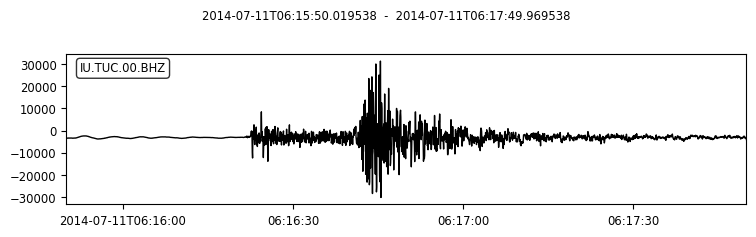

In [5]:
fig = tr.plot()

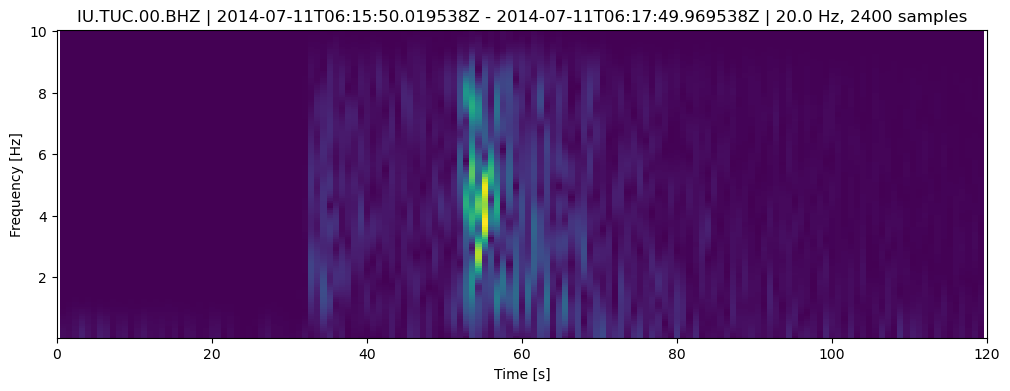

In [6]:
plt.rcParams['figure.figsize'] = (12, 4)
fig = tr.spectrogram(per_lap=.5, wlen=2)

We will examine a seismogram from an explosion of similar size at the same station. The time to request for this event is December 27, 1999 at 20:58:30, and you should request the same length of time as for the earthquake.

In [8]:
startt = UTCDateTime("1999-12-27T20:58:30") 
endt = UTCDateTime("1999-12-27T21:00:30")
st = client.get_waveforms(network, station, location, channel, startt, endt)

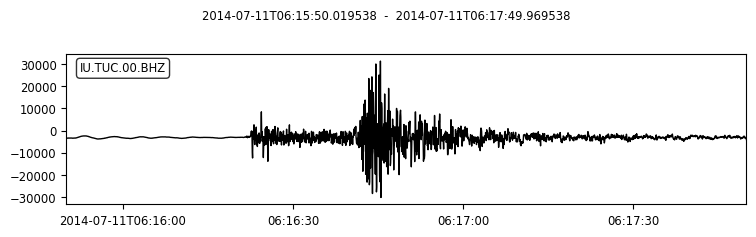

In [9]:
fig = tr.plot()
tr = st[0] 

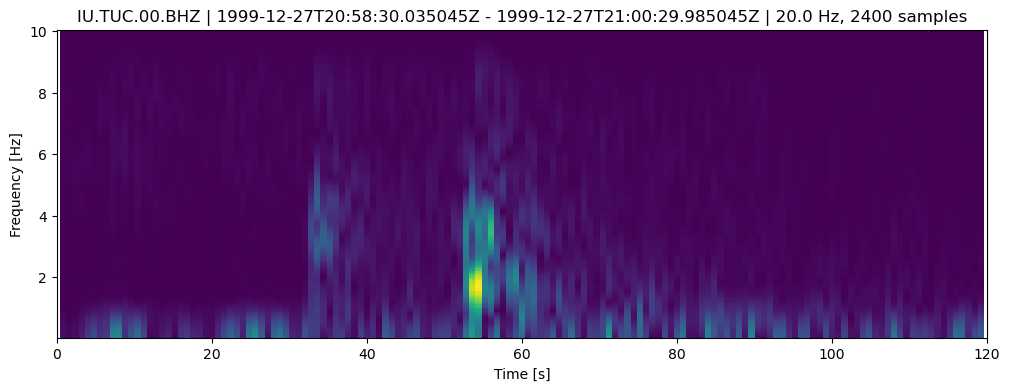

In [10]:
fig = tr.spectrogram(per_lap=.5, wlen=2)

<b>Ice quakes from Antarctica.</b><br>

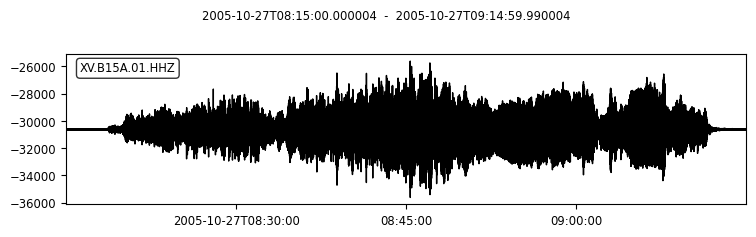

In [13]:
client = Client("IRIS")
net = "XV"
sta = "B15A"
loc = "01"
cha = "HHZ"
startt = UTCDateTime("2005-10-27T08:15")
endt = UTCDateTime("2005-10-27T09:15")
st = client.get_waveforms(net, sta, loc, cha, startt, endt)
tr = st[0]
fig = tr.plot()

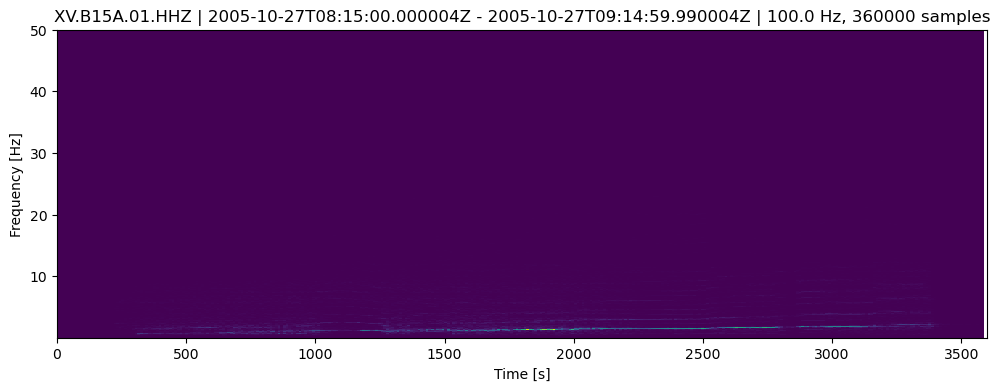

In [14]:
fig = tr.spectrogram(per_lap=.5, wlen=25)

(9.679014064345652e-05, 8985.243403218552)


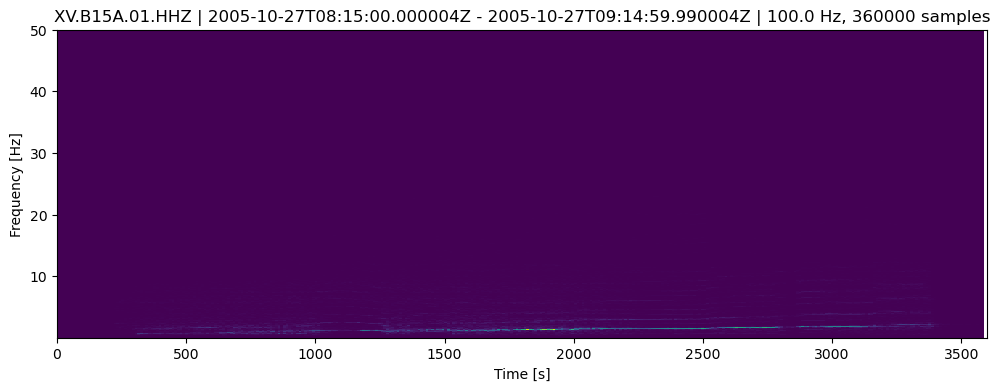

In [16]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=25)
ax = fig.axes[0]
im = ax.images[0]
print(im.get_clim())

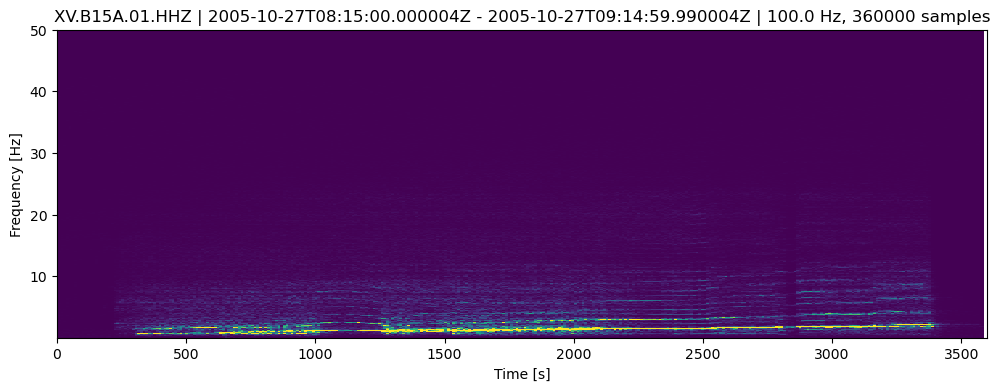

In [17]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=25)
ax = fig.axes[0]
im = ax.images[0]
im.set_clim(vmax=800)

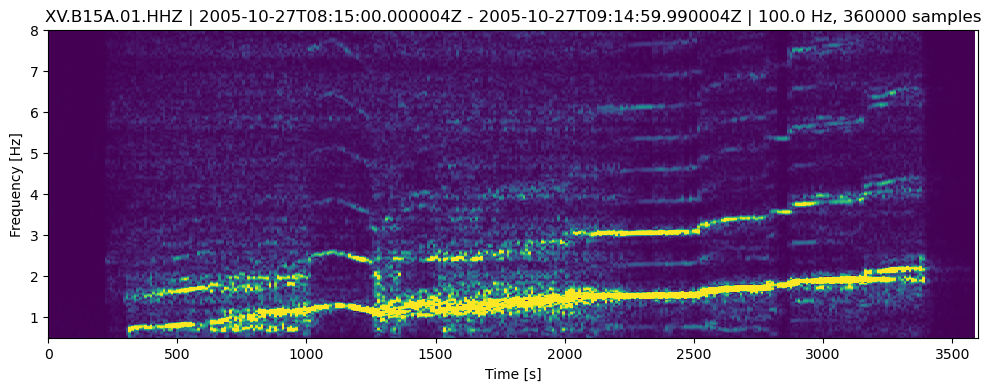

In [18]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=25)
ax = fig.axes[0]
ax.set_ylim(0.5, 8)
im = ax.images[0]
im.set_clim(vmax=800)

<b>Denali earthquake on the San Andreas Fault.</b><br>

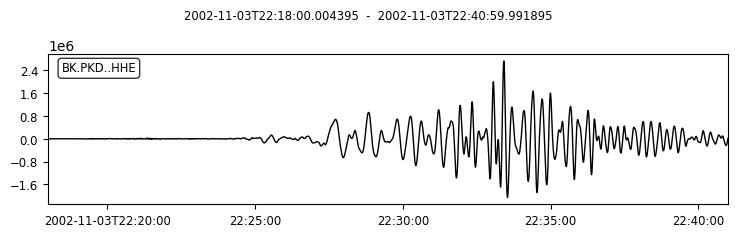

In [19]:
client = Client("NCEDC")
net = "BK"
sta = "PKD"
loc = ""
cha = "HHE"
startt = UTCDateTime("2002-11-03T22:18")
endt = UTCDateTime("2002-11-03T22:41")
st = client.get_waveforms(net, sta, loc, cha, startt, endt)
tr = st[0]
fig = tr.plot()

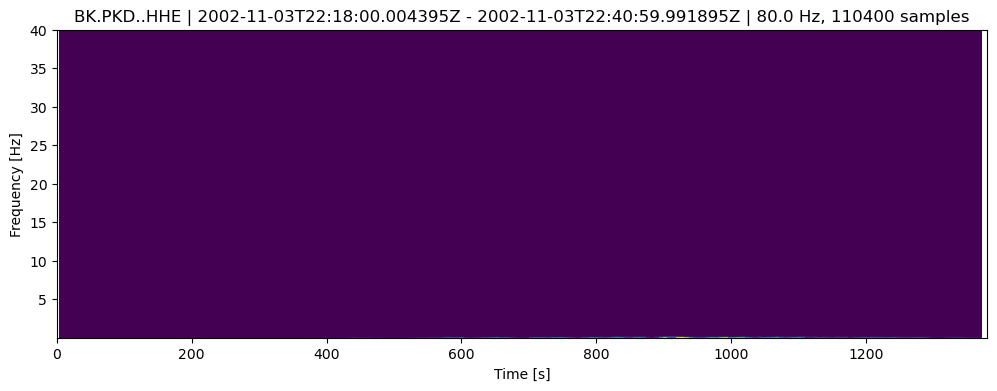

In [20]:
fig = tr.spectrogram(per_lap=.5, wlen=10)

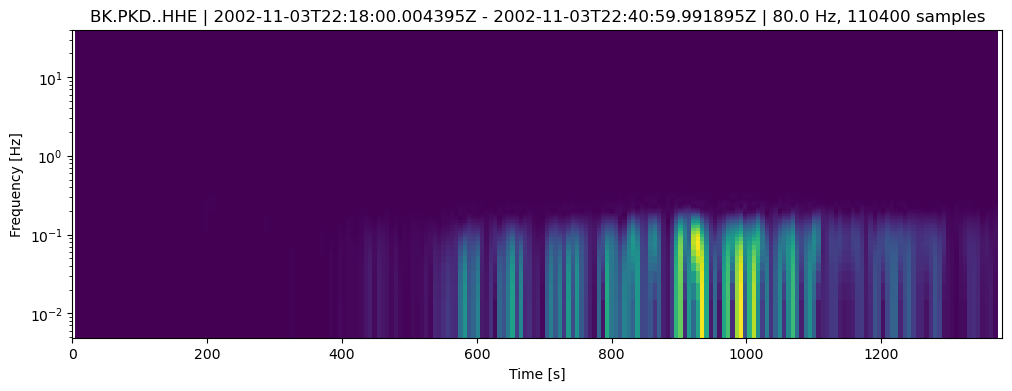

In [21]:
fig = tr.spectrogram(per_lap=.5, wlen=10, log=True)

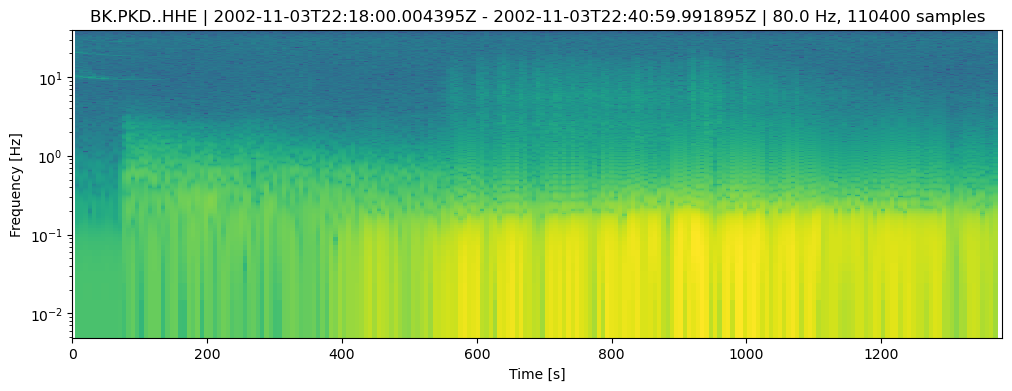

In [22]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, log=True, dbscale=True)

(-96.34717168809901, 134.0755363067488)


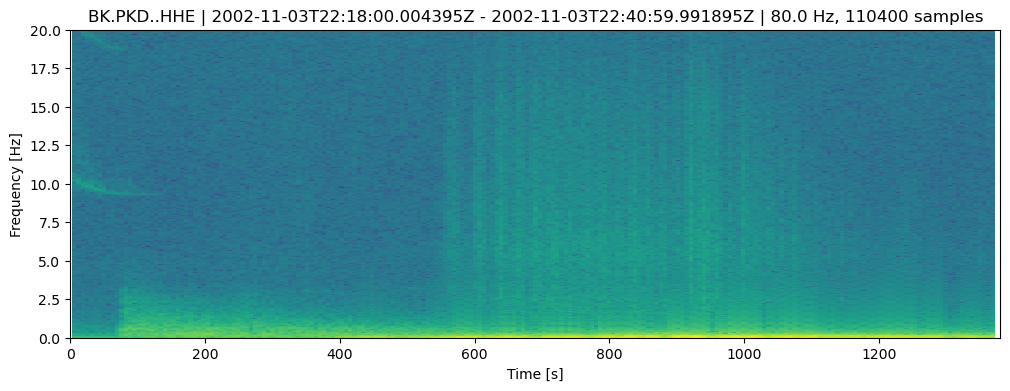

In [23]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, dbscale=True)
ax = fig.axes[0]
ax.set_ylim(0, 20)
im = ax.images[0]
print(im.get_clim())

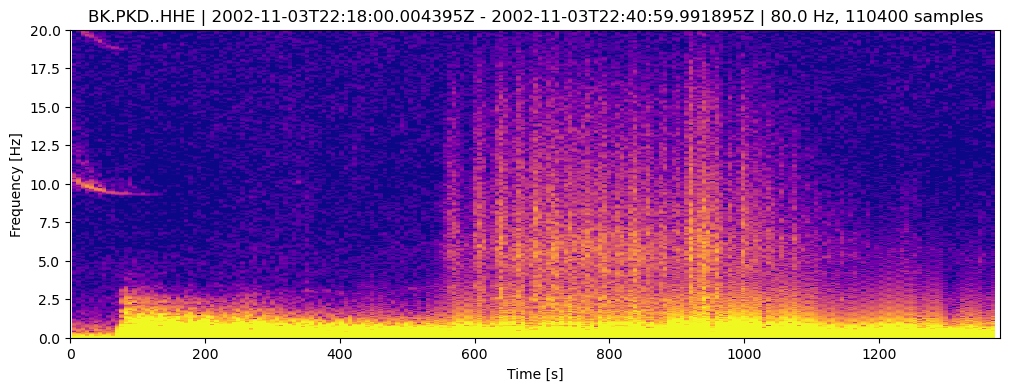

In [24]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, dbscale=True, cmap='plasma')
ax = fig.axes[0]
ax.set_ylim(0, 20)
im = ax.images[0]
im.set_clim(vmin=-10, vmax=50)

In [25]:
ftr = tr.copy()

In [26]:
ftr.filter(type='bandpass', freqmin=2.0, freqmax=20.0)

BK.PKD..HHE | 2002-11-03T22:18:00.004395Z - 2002-11-03T22:40:59.991895Z | 80.0 Hz, 110400 samples

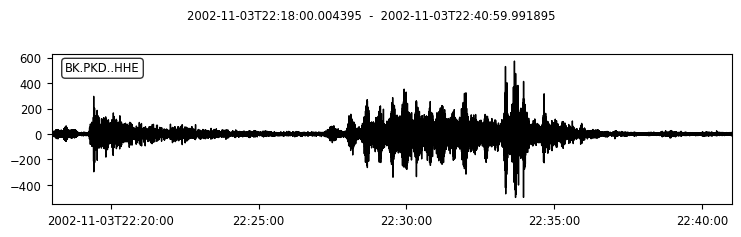

In [27]:
fig = ftr.plot()